# Загружаем библиотеки

In [22]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import re, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

### Для удобства изменяем формат для чисел с плаваующей точной 

In [23]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [24]:
movies = pd.read_csv(r'C:\Users\rusla\машинка\movies.csv')

### Отображаем наш дата сет

In [25]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


In [26]:
ratings = pd.read_csv(r'C:\Users\rusla\машинка\ratings.csv')

In [27]:
ratings

,userId,movieId,rating,timestamp
0,1,17,4.000,944249077
1,1,25,1.000,944250228
2,1,29,2.000,943230976
3,1,30,5.000,944249077
4,1,32,5.000,943228858
...,...,...,...,...
32000199,200948,79702,4.500,1294412589
32000200,200948,79796,1.000,1287216292
32000201,200948,80350,0.500,1294412671
32000202,200948,80463,3.500,1350423800


## Информация о дата сете movies

In [28]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


movies.describe(include='all')

## Просматриваем информацию о дата сете ratings

In [29]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [30]:
ratings.describe()

,userId,movieId,rating,timestamp
count,32000204.000,32000204.000,32000204.000,32000204.000
mean,100278.506,29318.610,3.540,1275241199.573
std,57949.046,50958.161,1.059,256162975.951
min,1.000,1.000,0.500,789652004.000
25%,50053.000,1233.000,3.000,1051012430.000
50%,100297.000,3452.000,3.500,1272621812.500
75%,150451.000,44199.000,4.000,1503158345.250
max,200948.000,292757.000,5.000,1697164147.000


# Обрабатываем наши данные

### Разделяем наши данные, для удобного вывода 

In [31]:
def change_title(text):
    return ' '.join(text.split()[:len(text.split()) - 1]), text.split()[len(text.split()) - 1][1:5]

In [32]:
movies[['title', 'year-production']] = pd.DataFrame(movies['title'].apply(change_title).to_list())

In [33]:
movies['genres'] = movies['genres'].apply(lambda text: text.split('|')[0])

In [34]:
movies.head(10)

,movieId,title,genres,year-production
0,1,Toy Story,Adventure,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995
5,6,Heat,Action,1995
6,7,Sabrina,Comedy,1995
7,8,Tom and Huck,Adventure,1995
8,9,Sudden Death,Action,1995
9,10,GoldenEye,Action,1995


### Сколько всего жанров представлено в дата сете

In [35]:
movies.genres.value_counts()

genres
Drama                 20680
Comedy                18463
Action                 9668
Documentary            8762
(no genres listed)     7080
Horror                 5005
Crime                  4049
Animation              3353
Adventure              3302
Children               2200
Thriller               1434
Romance                 801
Sci-Fi                  752
Western                 686
Mystery                 566
Fantasy                 512
War                     131
Musical                 103
Film-Noir                37
IMAX                      1
Name: count, dtype: int64

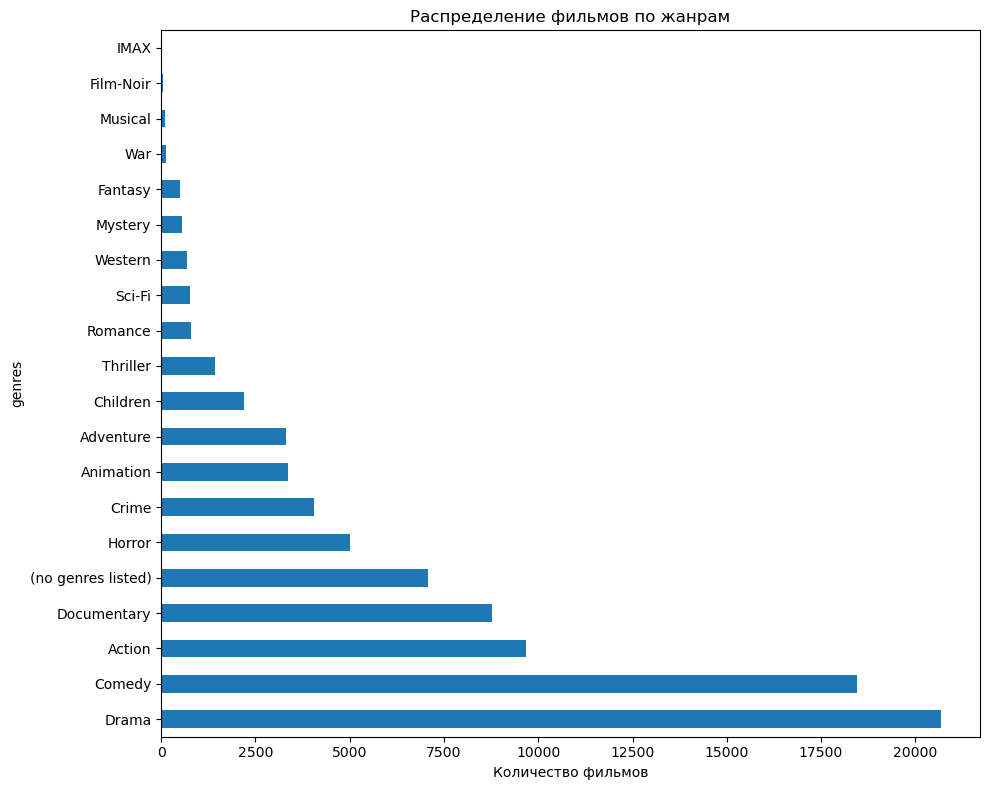

In [36]:
plt.figure(figsize=(10, 8))
movies.genres.value_counts().plot(kind='barh')
plt.title('Распределение фильмов по жанрам')
plt.xlabel('Количество фильмов')
plt.tight_layout()
plt.show()

## Удаляем поле "timestamp" из дата сета ratings

In [37]:
ratings = ratings.drop('timestamp', axis=1)

### Наш userId

In [38]:
userId = 222333

## id_films

In [39]:
movieId = [123314,
 170283,
 176207,
 1344,
 277696,
 38881,
 136728,
 163286,
 131806,
 59333,
 183651,
 127585,
 195367,
 128864,
 142100,
 124637,
 44949,
 185439,
 195121,
 1053,
 225956,
 183611,
 195067,
 173987,
 144015,
 262513,
 227887,
 200496,
 83798,
 271182,
 203026,
 274591,
 189139,
 145160,
 230703,
 282311,
 130902,
 274781,
 222419,
 213662,
 278518,
 170959,
 123026,
 242744,
 137026,
 291346,
 169442,
 152256,
 137881,
 174413,
 218305,
 65263,
 5558,
 221764,
 333,
 144928,
 183367,
 93510,
 48127,
 143910,
 108271,
 72681,
 199450,
 136894,
 285827,
 106234,
 2213,
 7988,
 119663,
 132060,
 180313,
 65764,
 168924,
 158066,
 153160,
 162378,
 49110,
 178393,
 259619,
 2924,
 184539,
 178829,
 68157,
 157136,
 99117,
 167410,
 173521,
 229587,
 4863,
 177009,
 254648,
 289057,
 195593,
 168412,
 82313,
 150292,
 173501,
 205941,
 207255,
 206220]

## добавляем рейтинг 

In [40]:
rating = [2.5,
 0.5,
 2.0,
 5.0,
 2.5,
 3.5,
 3.0,
 4.0,
 1.5,
 2.5,
 4.0,
 1.5,
 1.5,
 4.0,
 1.0,
 2.5,
 4.0,
 5.0,
 5.0,
 1.0,
 2.0,
 1.0,
 2.5,
 3.5,
 3.5,
 4.0,
 1.5,
 3.5,
 4.5,
 4.0,
 2.0,
 1.5,
 4.5,
 1.5,
 3.0,
 3.5,
 2.0,
 4.0,
 2.5,
 4.0,
 3.0,
 2.5,
 0.5,
 1.0,
 2.0,
 3.0,
 3.5,
 1.0,
 5.0,
 4.0,
 2.0,
 1.0,
 4.5,
 3.0,
 3.5,
 0.5,
 5.0,
 3.0,
 2.5,
 5.0,
 4.0,
 1.0,
 4.0,
 3.5,
 2.5,
 4.5,
 3.0,
 4.0,
 4.5,
 4.5,
 5.0,
 4.0,
 1.0,
 1.5,
 4.0,
 4.5,
 5.0,
 1.0,
 3.5,
 4.0,
 1.0,
 2.5,
 1.0,
 3.0,
 3.5,
 2.5,
 1.5,
 5.0,
 2.5,
 2.0,
 1.5,
 5.0,
 3.5,
 1.0,
 4.5,
 3.5,
 4.5,
 1.0,
 2.5,
 1.0]

In [41]:
my_df = pd.DataFrame({'userId' : [userId for _ in range(100)], 'movieId' : movieId, 'rating' : rating})

In [42]:
my_df

,userId,movieId,rating
0,222333,123314,2.500
1,222333,170283,0.500
2,222333,176207,2.000
3,222333,1344,5.000
4,222333,277696,2.500
...,...,...,...
95,222333,150292,3.500
96,222333,173501,4.500
97,222333,205941,1.000
98,222333,207255,2.500


## Объединяем датасеты для удобной работы

In [43]:
df_films_reviews = ratings.merge(movies, on='movieId')

In [44]:
df_films_reviews.dropna(inplace=True)

In [45]:
df_films_reviews.head(10)

,userId,movieId,rating,title,genres,year-production
0,1,17,4.000,Sense and Sensibility,Drama,1995
1,1,25,1.000,Leaving Las Vegas,Drama,1995
2,1,29,2.000,"City of Lost Children, The (Cité des enfants p...",Adventure,1995
3,1,30,5.000,Shanghai Triad (Yao a yao yao dao waipo qiao),Crime,1995
4,1,32,5.000,Twelve Monkeys (a.k.a. 12 Monkeys),Mystery,1995
5,1,34,2.000,Babe,Children,1995
6,1,36,1.000,Dead Man Walking,Crime,1995
7,1,80,5.000,"White Balloon, The (Badkonake sefid)",Children,1995
8,1,110,3.000,Braveheart,Action,1995
9,1,111,5.000,Taxi Driver,Crime,1976


In [46]:
df_films_reviews

,userId,movieId,rating,title,genres,year-production
0,1,17,4.000,Sense and Sensibility,Drama,1995
1,1,25,1.000,Leaving Las Vegas,Drama,1995
2,1,29,2.000,"City of Lost Children, The (Cité des enfants p...",Adventure,1995
3,1,30,5.000,Shanghai Triad (Yao a yao yao dao waipo qiao),Crime,1995
4,1,32,5.000,Twelve Monkeys (a.k.a. 12 Monkeys),Mystery,1995
...,...,...,...,...,...,...
32000199,200948,79702,4.500,Scott Pilgrim vs. the World,Action,2010
32000200,200948,79796,1.000,Centurion,Action,2010
32000201,200948,80350,0.500,Vampires Suck,Comedy,2010
32000202,200948,80463,3.500,"Social Network, The",Drama,2010


## Сохраняем данный дата сет

In [47]:
df_films_reviews.to_csv('df_reviews.csv')

# Составляем рекомендационный список фильмов

### Просматриваем рейтинг по всем фильмам

In [55]:
def popularite_films(df, min_percentile=0.9, top_n=10):
    """
    Функция для расчета популярных фильмов на основе взвешенного рейтинга 
    """
    ratings_stats = (df_films_reviews.groupby('title')['rating']
                    .agg(['mean', 'count'])
                    .rename(columns={'mean': 'avg_rating', 'count': 'count_rating'})
                    .reset_index())
    
    v = ratings_stats["count_rating"]
    R = ratings_stats["avg_rating"]
    m = v.quantile(min_percentile)
    c = R.mean()
    
    ratings_stats['w_score'] = ((v * R) + (m * c)) / (v + m)
    
    result = (ratings_stats
              .sort_values('w_score', ascending=False)
              .head(top_n)
              [['title', 'w_score', 'avg_rating', 'count_rating']]
              .reset_index(drop=True))
    
    return result

df_popularite_films = popularite_films(df_films_reviews)
print("Топ-10 популярных фильмов по взвешенному рейтингу:")
print(df_popularite_films)

print(f"\nСтатистика расчета:")
print(f"- Средний рейтинг по всем фильмам (c): {df_films_reviews['rating'].mean():.2f}")
print(f"- Минимальный порог оценок (m): {df_films_reviews.groupby('title')['rating'].count().quantile(0.9):.0f}")


Топ-10 популярных фильмов по взвешенному рейтингу:
                       title  w_score  avg_rating  count_rating
0  Shawshank Redemption, The    4.401       4.405        102929
1               Planet Earth    4.317       4.442          2952
2             Godfather, The    4.312       4.317         66440
3           Band of Brothers    4.297       4.427          2811
4            Planet Earth II    4.266       4.447          1956
5        Usual Suspects, The    4.260       4.265         67750
6    Godfather: Part II, The    4.256       4.264         43111
7                   Parasite    4.256       4.286         11819
8               12 Angry Men    4.238       4.253         22909
9           Schindler's List    4.232       4.237         73849

Статистика расчета:
- Средний рейтинг по всем фильмам (c): 3.54
- Минимальный порог оценок (m): 282


# Система рекомендаций по жанрам

In [59]:
def popularite_films_by_genre(genre, min_percentile=0.9, top_n=10):
    """
    Рекомендация популярных фильмов по жанру на основе взвешенного рейтинга
    """
    
    df_genre = df_films_reviews[df_films_reviews['genres'] == genre]
    
    if len(df_genre) == 0:
        print(f"Фильмов жанра '{genre}' не найдено!")
        return pd.DataFrame()
    
    ratings_stats = (df_genre.groupby('title')['rating']
                    .agg(['mean', 'count'])
                    .rename(columns={'mean': 'avg_rating', 'count': 'count_rating'})
                    .reset_index())
    
    v = ratings_stats["count_rating"]
    R = ratings_stats["avg_rating"]
    m = v.quantile(min_percentile)
    c = R.mean()
    
    ratings_stats['w_score'] = ((v * R) + (m * c)) / (v + m)
    

    print(f"- Минимальный порог оценок (m): {m:.0f}")
    print(f"- Максимальное количество оценок у фильма: {v.max():.0f}")
    print(f"- Минимальное количество оценок у фильма: {v.min():.0f}")
    print("=" * 50)
    
    result = (ratings_stats
              .sort_values('w_score', ascending=False)
              .head(top_n)
              [['title', 'w_score', 'avg_rating', 'count_rating']]
              .reset_index(drop=True))
    
    return result

df_popularite_films_by_genre = popularite_films_by_genre('Drama')
print("Топ драматических фильмов:")
print(df_popularite_films_by_genre)

- Минимальный порог оценок (m): 291
- Максимальное количество оценок у фильма: 73849
- Минимальное количество оценок у фильма: 1
Топ драматических фильмов:
                                          title  w_score  avg_rating  \
0                                  12 Angry Men    4.250       4.265   
1                              Schindler's List    4.233       4.237   
2               One Flew Over the Cuckoo's Nest    4.197       4.204   
3                                    Casablanca    4.185       4.195   
4  Lives of Others, The (Das leben der Anderen)    4.174       4.199   
5        Sunset Blvd. (a.k.a. Sunset Boulevard)    4.162       4.196   
6                                      Whiplash    4.139       4.154   
7                                Paths of Glory    4.125       4.179   
8                         To Kill a Mockingbird    4.119       4.134   
9                                 All About Eve    4.114       4.161   

   count_rating  
0         21863  
1         73849

In [61]:
df_popularite_films_by_genre = popularite_films_by_genre('Drama')
df_popularite_films_by_genre

- Минимальный порог оценок (m): 291
- Максимальное количество оценок у фильма: 73849
- Минимальное количество оценок у фильма: 1


,title,w_score,avg_rating,count_rating
0,12 Angry Men,4.250,4.265,21863
1,Schindler's List,4.233,4.237,73849
2,One Flew Over the Cuckoo's Nest,4.197,4.204,44592
3,Casablanca,4.185,4.195,32190
4,"Lives of Others, The (Das leben der Anderen)",4.174,4.199,12273
5,Sunset Blvd. (a.k.a. Sunset Boulevard),4.162,4.196,9072
6,Whiplash,4.139,4.154,19482
7,Paths of Glory,4.125,4.179,5490
8,To Kill a Mockingbird,4.119,4.134,18785
9,All About Eve,4.114,4.161,6068


In [62]:
df_popularite_films_by_genre = popularite_films_by_genre('Comedy')
df_popularite_films_by_genre

- Минимальный порог оценок (m): 433
- Максимальное количество оценок у фильма: 100296
- Минимальное количество оценок у фильма: 1


,title,w_score,avg_rating,count_rating
0,Parasite,4.265,4.312,11670
1,Pulp Fiction,4.192,4.197,98409
2,Dr. Strangelove or: How I Learned to Stop Worr...,4.187,4.203,32830
3,Life Is Beautiful (La Vita è bella),4.134,4.150,29819
4,"Sting, The",4.117,4.143,18416
5,Fargo,4.108,4.117,58031
6,Intouchables,4.093,4.119,18416
7,"Amelie (Fabuleux destin d'Amélie Poulain, Le)",4.072,4.082,43459
8,"Philadelphia Story, The",4.069,4.131,7445
9,Snatch,4.053,4.067,32509


### Система рекомендаций по названию фильма

In [63]:
new_df = df_films_reviews[(df_films_reviews['userId'].map(df_films_reviews['userId'].value_counts()) > 1000) | (df_films_reviews['userId'] == 222333)]
new_df.shape

(5831129, 6)

In [64]:
users_pivot=new_df.pivot_table(index=["userId"],columns=["title"],values="rating")
users_pivot.fillna(0,inplace=True)

In [65]:
users_pivot.head()

title,,"""BLOW THE NIGHT!"" Let's Spend the Night Together","""Great Performances"" Cats","""Sr.""",#1 Cheerleader Camp,#Alive,#AnneFrank. Parallel Stories,#Captured,#Female Pleasure,#FollowMe,...,طلامس,‘Rameau’s Nephew’ by Diderot (Thanx to Dennis Young) by Wilma Schoen,…And Plays Tricks,…And the Fifth Horseman Is Fear,キサラギ,チェブラーシカ,牛づれ超特急,茶叶之旅,貞子3D,줄탁동시
userId,,,,,,,,,,,,,,,,,,,,,
28,4.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
188,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
265,3.333,0.000,0.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
354,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
360,3.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [66]:
def same_films(name_film):
    users_vote_film=users_pivot[name_film]
    similar_with=users_pivot.corrwith(users_vote_film)
    similar_with = pd.DataFrame({'title' : similar_with.to_dict().keys(), 'correlation' : similar_with.to_dict().values()})
    df=similar_with.sort_values('correlation',ascending=False).reset_index(drop=True).iloc[1:11]
    return df

In [67]:
new_df[new_df.userId == 28].genres.value_counts()

genres
Comedy                829
Action                722
Drama                 609
Adventure             209
Crime                 175
Documentary            66
Animation              58
Children               49
Horror                 41
Thriller               25
Mystery                15
Western                11
Sci-Fi                 10
Fantasy                 8
Romance                 7
Musical                 3
(no genres listed)      3
Film-Noir               2
Name: count, dtype: int64

In [68]:
same_films('Paris')

,title,correlation
1,Chinese Puzzle (Casse-tête chinois),0.338
2,Fill the Void (Lemale et ha'halal),0.313
3,Russian Dolls (Les poupées russes),0.298
4,Just a Sigh,0.291
5,Back to Burgundy,0.283
6,"Syrian Bride, The",0.282
7,"Summer Hours (Heure d'été, L')",0.282
8,Potiche,0.280
9,2 Days in Paris,0.274
10,Something in the Air (Après Mai),0.265


## Система рекомендаций по схожести интересов

In [69]:
users_pivot

title,,"""BLOW THE NIGHT!"" Let's Spend the Night Together","""Great Performances"" Cats","""Sr.""",#1 Cheerleader Camp,#Alive,#AnneFrank. Parallel Stories,#Captured,#Female Pleasure,#FollowMe,...,طلامس,‘Rameau’s Nephew’ by Diderot (Thanx to Dennis Young) by Wilma Schoen,…And Plays Tricks,…And the Fifth Horseman Is Fear,キサラギ,チェブラーシカ,牛づれ超特急,茶叶之旅,貞子3D,줄탁동시
userId,,,,,,,,,,,,,,,,,,,,,
28,4.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
188,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
265,3.333,0.000,0.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
354,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
360,3.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200611,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
200638,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
200758,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [70]:
film_df_matrix = csr_matrix(users_pivot.values)

In [71]:
def find_favorite_films(User_id, num_books=10):
    # Initialize the NearestNeighbors model
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(film_df_matrix)
    
    # Find the index of the input user
    user_index = users_pivot.index.get_loc(User_id)
    
    # Query the nearest neighbors
    distances, indices = model_knn.kneighbors(film_df_matrix[user_index], n_neighbors=num_books+1)
    # Exclude the first index (which is the input user's own preferences)
    favorite_indices = indices[0][1:]
    favorite_distances = distances[0][1:]

    # Get the names of favorite films based on indices
    list_favorite_films = [users_pivot.columns[idx] for idx in favorite_indices]
    favorite_films=pd.DataFrame({"favorite films ":list_favorite_films, "distances" : favorite_distances})
    return favorite_films

In [77]:
find_favorite_films(28)

,favorite films,distances
0,A Very Honorable Guy,0.378
1,A Free Bird,0.388
2,A Christmas Kiss,0.394
3,A Fan's Notes,0.397
4,A Siren in the Dark,0.400
5,Afghan Muscles,0.404
6,A Matter of Time,0.404
7,Alarmed,0.404
8,A Place For Paedophiles,0.407
9,Alien Nation: The Enemy Within,0.409


# Вывод

## Загрузка дата сета:
* Дата сет скачен из источника: https://grouplens.org/datasets/movielens/32m/
* в комплекте шел дата сет с фильмами, и рейтингом, именно они использовались в этой работе
* Название дата сетов: movies.csv\ ratings.csv


## Процесс работы:
* Импортированны библиотеки для работы с дата сетами
* Обработка дата сета
* объединение 2-х дата сетов в 1

## Разработка ML приложения

* Разработать приложение, где мы сможешь просматривать топ 10 фильмов, исходя от того, что нам предложит системма

# Цель работы:
### с помощью рекомендационной системы вывести фильмы\жанры\схожесть интересов\фильмы по названию

* наша задача определить рекомендацию для каждого пользователя
  